# Risposta dinamica dei sistemi di controllo

Oggi approfondiamo la comprensione della risposta dinamica dei sistemi di controllo.

Dopo aver introdotto la funzione di trasferimento di un impianto, che si riferisce alla modellizzazione dell'impianto, e ai modelli di disturbi e segnali di test, siamo pronti ad esplorare la risposta dinamica del sistema. Visualizziamo il nostro modello.

<table><tr>
<td> <img src="../pics/05_dynamic_systems_input-output-diagram-using-trasfer-function-model.png?1" alt="input-output-diagram-using-trasfer-function-model" style="width: 450px;"/>
</tr></table>

Ricorda, la forma generale per l'output del sistema nel dominio di Laplace è $Y(s)=G(s)R(s)$. Questa relazione trasforma la convoluzione nel dominio del tempo in moltiplicazione nel dominio s.

Quando siamo interessati alla risposta temporale $y(t)$, dovremo ottenere $G(s)$ e $R(s)$, calcolare $Y(s)$ e infine invertire per ottenere $y(t )$.

Considerando l'inversione di Laplace, è tabulato in vari libri di testo, quindi non approfondiremo le sue derivazioni. Utilizzeremo piuttosto queste tabelle per scopi di inversione.

Ricordiamo che $R(s)$ sono modellati tipicamente attraverso impulso, gradino, rampa e parabole.

## Coppie comuni di trasformata di Laplace

<table><tr>
<td> <img src="../pics/05_dynamic_systems_table-1-complete-laplace-transform-table-cut.png" alt="table-1-complete-laplace-transform-table-cut" style="width: 450px;"/>
</tr></table>

**Domanda pop-up:** Ricordi il significato della funzione di trasferimento nei sistemi di controllo?

Risposta: La funzione di trasferimento, $G(s)$, rappresenta la relazione tra l'input e l'output di un sistema nel dominio di Laplace. È uno strumento cruciale per l'analisi e la progettazione dei sistemi di controllo.

Per maggiore chiarezza, analizziamo alcuni esempi:

### Esempio 1

$$
G(s) = \frac{1}{s^2+3s+2}
$$

Si osserva che il polinomio del numeratore è di ordine zero e il polinomio del denominatore è di secondo ordine, il che implica un sistema di secondo ordine. Per rappresentarlo nella forma polo zero:

$$
G(s) = \frac{1}{(s+1)(s+2)}
$$

Dato l'input $ r(t) = 5 \mu(t) $, un input a gradino di grandezza 5, sappiamo che $ R(s) = \frac{5}{s} $.

Pertanto, $ Y(s) = G(s) R(s) $ diventa:
$$ Y(s) = \frac{5}{s(s+1)(s+2))} $$

Ora abbiamo tre poli nel trasferimento della risposta.

Deriviamo la risposta $y(t)$ da $Y(s)$.

Per sistemi come questo, l'uso della scomposizione parziale delle frazioni aiuta a scomporre espressioni complesse, che possono quindi essere facilmente trasformate in senso inverso nel dominio del tempo.

Analizziamo come eseguire questa operazione: `06_inverse_laplace_transform`

Applicando l'espansione delle frazioni otteniamo:

$$ Y(s) = \frac{5}{s(s+1)(s+2))} = \frac{5/2}{s} - \frac{5}{s+1} + \ frac{5/2}{(s+2)}$$

Nota:
- $- \frac{5}{s+1} + \frac{5/2}{(s+2)}$ sono dovuti ai poli del sistema
- $\frac{5/2}{s}$ è dovuto al polo di eccitazione

Invertendo $Y(s)$ otteniamo:

$$
y(t) = \frac{5}{2} - 5e^{-t} + \frac{5/2}e^{-2t}
$$

- I termini $- 5e^{-t} + \frac{5/2}e^{-2t}$ vengono generati quando il sistema è eccitato dall'input del passo. Questi due termini svaniscono con l'aumentare del tempo. Questa è la **risposta transitoria** del sistema

- Il termine $\frac{5}{2}$ è dovuto al polo di eccitazione e la sua natura è simile all'ingresso stesso. Tuttavia la sua ampiezza è stata modificata e ciò dipende dalla risposta del sistema all'input.
Poiché l'input persiste per sempre, questa risposta specifica persisterà per sempre. Questa è chiamata la **risposta allo stato stazionario**.

### Il teorema del valore finale

Il teorema del valore finale è uno strumento indispensabile per determinare il valore in stato stazionario della risposta di un sistema senza dover calcolare l'intera risposta nel dominio del tempo.

$$
y_{ss} = \lim_{t \to \infty} y(t) = \lim_{s \to 0} s Y(s)
$$

È essenziale notare che il Teorema del Valore Finale è applicabile se e solo se sono soddisfatte le seguenti condizioni:

- I poli di $Y(s)$ si trovano nella metà sinistra del piano s, garantendo la stabilità della funzione.

Ciò significa che $s Y(s)$ non ha poli sull'$asse j\omega$ e/o sul semipiano destro.

**Domanda pop-up**: Perché ci concentriamo sulla metà sinistra del piano s per l'applicazione del Teorema del valore finale?

**Risposta**: I sistemi con poli nella metà destra del piano s sono instabili e le loro risposte tendono all'infinito come $t→∞$. Il teorema richiede che la funzione si stabilizzi o raggiunga un valore stazionario quando il tempo si avvicina all'infinito.

Nel nostro caso:

$$
s Y(s) = \frac{5s}{s(s+1)(s+2))}
$$

e quindi:

$$
y_{ss} = \lim_{s \to 0} s Y(s) = \frac{5}{2}
$$

Possiamo ora tracciare la risposta al gradino del sistema, ovvero $y(t)$.

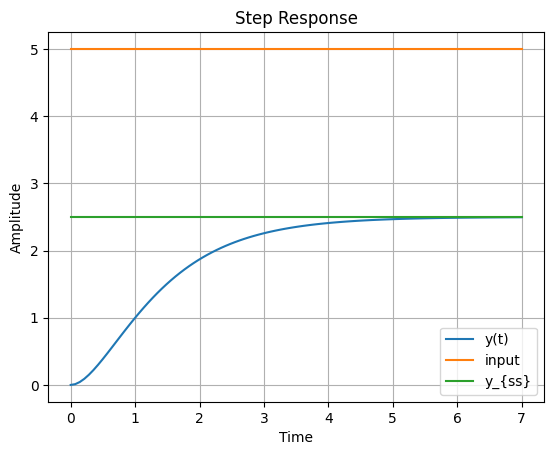

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

# Python code to obtain time response
sys = lti([5], [1, 3, 2])
t, y = step(sys)
plt.plot(t, y, label='y(t)')
plt.plot(t, np.linspace(5,5,num=len(t)), label='input')
plt.plot(t, np.linspace(5/2,5/2,num=len(t)), label='y_{ss}')
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

### Esempio 2

Consideriamo la stessa pianta di prima:

$$
G(s) = \frac{1}{s^2+3s+2}
$$

ma ora con un ingresso rampa:

$$
r(t) = 5t\mu(t)
$$

la cui trasformata di Laplace è

$$
R(s) = \frac{5}{s^2}
$$

e la trasformazione della risposta è:

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)}
$$

Possiamo calcolare la trasformata inversa con la scomposizione della frazione parziale.

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)} = \\
\frac{5/2}{s^2} + \frac{K}{s} + \frac{5}{s+1} - \frac{5/4}{s+2}
$$

Dove

$$
K= \frac{d}{ds}\Big[\frac{5}{(s+1)(s+2)}\Big]\Big|_{s=0} = \frac{d}{ds }\Big[\frac{5}{(s^2+3s+2)}\Big]\Big|_{s=0} = - \frac{5(2s+3)}{(s^2+ 3s+2)^2)}\Grande|_{s=0} = \frac{-15}{4}
$$

e quindi l'espressione completa è:

$$
Y(s) = \frac{5}{s^2(s+1)(s+2)} = \\
\frac{5/2}{s^2} - \frac{15/4}{s} + \frac{5}{s+1} - \frac{5/4}{s+2}
$$

Possiamo invertire:

$$
y(t) = \frac{5}{2}t - \frac{15}{4} + 5e^{-t} - \frac{5}{4}e^{-2t}
$$

Anche in questo caso i termini dovuti ai poli del sistema vanno a zero (componente transitoria).
L'altra componente è dovuta alla presenza dell'ingresso rampa specifico.

$$
y_{ss} = \frac{5}{2}t - \frac{15}{4}
$$

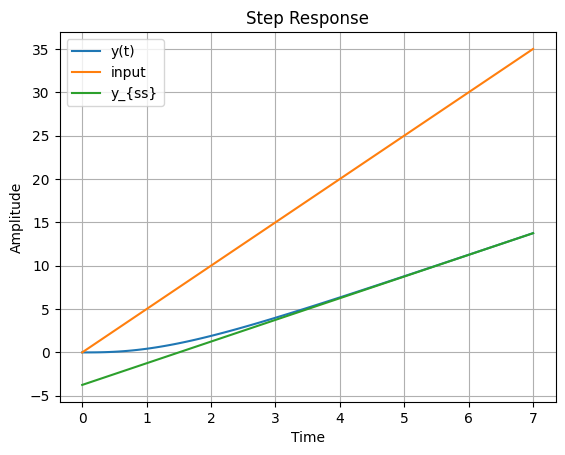

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

sys = lti([5], [1, 3, 2])
t, y = step(sys)

# Python code to obtain time response
y = 5/2*t-15/4 + 5*np.exp(-t) - 5/4*np.exp(-2*t)
plt.plot(t, y, label='y(t)')
plt.plot(t, 5*t, label='input')
plt.plot(t, 5/2*t-15/4, label='y_{ss}')
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

Possiamo applicare il teorema del valore finale?


$$
y_{ss} = \lim_{t \to \infty} y(t) = \lim_{s \to 0} s Y(s) = \lim_{s \to 0} \frac{5s}{s^2 (s+1)(s+2)} = \inf
$$

Tuttavia c'è un polo all'origine e il teorema del valore finale non è applicabile.
Lo stato stazionario inizia non appena il transitorio si esaurisce. I due valori corrispondono all'infinito, ma l'espressione dello stato stazionario totale non è ottenuta dal teorema del valore finale a causa della presenza di un polo nell'origine in $sY(s)$.

# Caratteristiche dei sistemi del Primo e del Secondo Ordine

Perché concentrarsi specificamente sui modelli del primo e del secondo ordine tra la moltitudine di possibili modelli dell’ennesimo ordine? La risposta sta nella loro onnipresenza e significato. La maggior parte dei sistemi che studieremo può essere adeguatamente descritta utilizzando questi modelli, rendendoli cruciali nella progettazione dei sistemi di controllo.

**Domanda pop-up**: Cosa intendiamo per "ordine" di un sistema?

**Risposta**: L'"ordine" di un sistema si riferisce alla potenza più alta della derivata nella sua equazione differenziale che lo governa. Indica la complessità del sistema e il numero di condizioni iniziali richieste per una soluzione completa.

## Sistemi del primo ordine

Consideriamo un semplice sistema meccanico: un carico inerziale con un momento di inerzia,
$J$.
Questo carico è collegato a un albero rigido, il che implica che la costante elastica per questo albero è zero (non è flessibile).

<table><tr>
<td> <img src="../pics/05_dynamic_systems_inertial-load.png?1" alt="inertial-load" style="width: 450px;"/>
</tr></table>

L'ambiente di attrito del sistema può essere schematicamente illustrato attraverso due cuscinetti di forza caratterizzati da un coefficiente di attrito viscoso, $B$.

In questo sistema:

- **Variabile di ingresso**: Coppia, $T(t)$
- **Variabile di output**: Velocità, $ω(t)$
- **Parametri costanti**: $J$ e $B$

In base alle leggi di Newton, l'equazione governante diventa:

$$
J\punto\omega(t)+B\omega(t)(t)=T(t)
$$

Dopo aver applicato la trasformazione di Laplace:

$$
Js\omega(s)+B\omega(s)=T(s)
$$

Nota: nelle nostre discussioni, i sistemi saranno considerati "rilassati", il che significa che le condizioni iniziali non compaiono nell'equazione trasformata.

Da ciò si deriva la funzione di trasferimento $G(s)$:

$$
G(s)=\frac{\omega(s)}{T(s)} = \frac{1}{Js+B}
$$

che è un modello del primo ordine, con parametri $J$ e $B$.

## Un modello generale per i sistemi del primo ordine

Ogni sistema del primo ordine, indipendentemente dal suo dominio (meccanico, elettrico, termico, ecc.), può essere generalizzato utilizzando la seguente forma:

$$
G(s) = \frac{K}{(\tau s+1)}
$$

Con parametri:
- $K$: guadagno del sistema.
- $\tau$: costante di tempo del sistema.

Il termine "guadagno del sistema" si riferisce alla variazione di stato stazionario dell'output per una variazione unitaria dell'input. Nel frattempo, la costante di tempo descrive la velocità con cui il sistema risponde ai cambiamenti.

Ad esempio, se applichiamo un input di passo unitario:

$$
T(s)=\frac{1}{s},
$$

la risposta diventa:

$$
\omega(s) = \frac{K}{s(\tau s+1)}
$$

La risposta nel dominio del tempo, $\omega(t)$, dopo l'inversione, caratterizza il comportamento dinamico del sistema:

$$
\omega(t) = K \Grande[ 1 - e^{-t/\tau}\Grande]
$$

### Decodifica dei parametri:

- **Guadagno del sistema, $K$**: Quando $t→∞$, $\omega(t)$ si avvicina a $K$, illustrando il motivo per cui $K$ è definito guadagno del sistema.
    - La velocità del nostro sistema (il carico inerziale) cambia al valore $K$ in risposta ad un passo unitario. Cambia l'output del sistema di $K$.
    
- **Costante di tempo, $\tau$**: la costante di tempo indica la velocità di risposta del sistema. Per capirlo, abbozziamo la risposta del sistema:

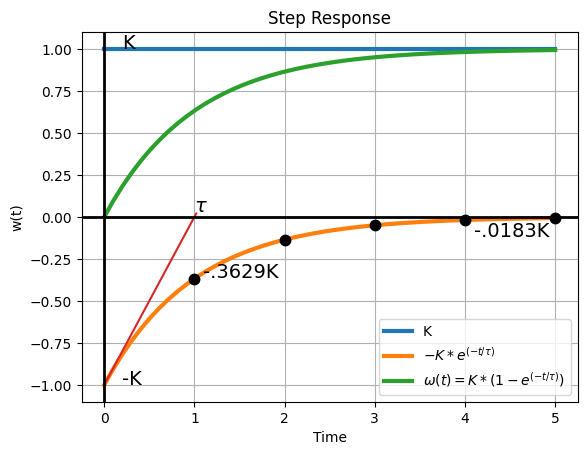

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
tau = 1

t = np.linspace(0, 5, 50)
w_t = K*(1-np.exp(-t/tau))
transient = -K*np.exp(-t/tau)

# Create a new figure and axis
fig, ax = plt.subplots()

ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')
ax.plot(t, transient, label=r'$-K*e^{(-t/\tau)}$', linewidth=3)
ax.plot(t, w_t, label=r'$\omega(t)=K*(1-e^{(-t/\tau)})$', linewidth=3)
ax.plot(t[0:11], K/tau*t[0:11]-K)

for t_bar in [tau, 2*tau, 3*tau, 4*tau, 5*tau]:
    ax.plot(t_bar, -K*np.exp(-t_bar/tau), markersize=15, marker='.', color='k')

plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel("w(t)")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(tau, 0.03, r'$\tau$', fontsize=14)
ax.text(0.2, K, 'K', fontsize=14)
ax.text(0.2, -K, '-K', fontsize=14)

ax.text(tau+0.1, -K*0.3629, '-.3629K', fontsize=14)
ax.text(4*tau+0.1, -K*0.0183-0.1, '-.0183K', fontsize=14)

plt.legend()
plt.show()

Il valore finale della risposta è $K$.

Per quanto riguarda il termine transitorio $-Ke^{-t/\tau}$, esso diminuisce fino a zero quando $t$ si avvicina all'infinito.

Immergiamoci nel transitorio. Valutando:

$$
\frac{d}{dt}\Grande( -Ke^{-t/\tau} \Grande) \Grande|_{t=0} = \frac{K}{\tau}
$$

ne deduciamo che il tasso di variazione iniziale del transitorio a $t=0$ è $\frac{K}{\tau}$.

Se il transitorio mantenesse il suo tasso di diminuzione iniziale, svanirebbe in una durata di $\tau$.

Questa costante di tempo ci dà un'idea della durata necessaria affinché il transitorio diminuisca se il declino fosse guidato esclusivamente dal suo tasso di variazione iniziale $\frac{K}{\tau}$.

Tuttavia, questo tasso non è statico. Osservando i valori specifici:

| $t$ | $e^{-t/\tau}$|
|-----|--------------|
| $\tau$ | 0,3679 |
| $4\tau$ | 0,0183 |
| $5\tau$ | 0,0067 |

Vediamo che tra $4\tau$ e $5\tau$ il transitorio è quasi inesistente, indicando il tempo necessario affinché il sistema si stabilizzi. Ricorda, tuttavia, che diventa veramente zero solo quando $t$ si avvicina all'infinito.

Da un punto di vista pragmatico è ragionevole affermare che il sistema ha raggiunto lo stato stabile in $5\tau$.

**Domanda pop-up**: Perché la costante di tempo è cruciale nella progettazione del sistema di controllo?

**Risposta**: la costante di tempo indica la velocità di risposta del sistema. Per risposte rapide desiderate, è preferibile una costante di tempo più piccola. Costanti di tempo maggiori potrebbero rallentare la risposta del sistema, il che è spesso indesiderabile nelle applicazioni di controllo.

Nella dinamica dei sistemi di controllo, la velocità di risposta con cui un sistema reagisce è cruciale. All'introduzione di un input, uno dei nostri obiettivi è (tipicamente) che l'impianto risponda senza ritardi.

Considerando la costante di tempo del sistema – dove sono necessari tra $ 4\tau$ e $ 5\tau$ per raggiungere lo stato stazionario – una costante di tempo più breve implica una risposta più rapida. Al contrario, una costante di tempo più lunga suggerisce la tendenza del sistema a rispondere più lentamente.

#### Sistemi lenti e veloci:

Un sistema definito "lento" possiede tipicamente una grande costante di tempo. Sistemi che gestiscono il controllo della temperatura, i livelli dei liquidi, la pressione o le composizioni chimiche: questi sono gli ambiti delle applicazioni di controllo dei processi e la maggior parte di queste applicazioni di solito hanno costanti di tempo elevate; in sostanza, sono "lenti".

Ciò è in contrasto con sistemi come il controllo della velocità o il tracciamento radar. Questi ultimi sistemi hanno costanti di tempo più piccole, il che li contrassegna come sistemi "veloci".


Giusto per fornire una scala, la costante di tempo dei sistemi può variare da semplici millisecondi (come si vede nei sistemi di tracciamento radar o di controllo della velocità) a pochi minuti, comunemente osservati, tra gli altri, nelle configurazioni di controllo della temperatura.

#### Ritardo del primo ordine

La funzione di trasferimento che abbiamo visto prima

$$
G(s) = \frac{K}{(\tau s+1)}
$$

è noto come ritardo del primo ordine. In sostanza, quando vediamo questo termine, suggerisce che il sistema non consente una risposta istantanea.

Questo sistema, chiamato ritardo del primo ordine o semplicemente 'ritardo semplice', è completamente caratterizzato da due parametri: $K$ (guadagno del sistema) e $\tau$ (costante di tempo).

# Sistemi del secondo ordine

Andando avanti dai sistemi del primo ordine, incontriamo anche i sistemi del secondo ordine. Qui è essenziale un’analisi più approfondita, poiché la maggior parte dei sistemi di ordine superiore (anche quelli del quarto, quinto o decimo ordine) possono spesso essere ben approssimati dai sistemi del secondo ordine. Ciò rende la comprensione dei sistemi del secondo ordine essenziale per le nostre considerazioni sulla progettazione.

Immagina un carico avente un momento di inerzia $J$.
In questo scenario, l'albero viene reso flessibile, con la coppia $T$ come input.
Questa flessibilità dell'albero può essere descritta da una costante elastica, indicata come piccola $k$ (distinta dal guadagno del sistema $K$). L'attrito in questo sistema è rappresentato schematicamente e supponiamo che $B$ rappresenti il ​​parametro dell'attrito viscoso. La torsione o posizione di questo albero, indicata come $\theta$, è ciò che ci interessa.


<table><tr>
<td> <img src="../pics/05_dynamic_response_inertial-load-flexible-shaft-clearer.png?1" alt="inertial-load-flexible-shaft" style="width: 450px;"/>
</tr></table>

In questo sistema:

- **Variabile di ingresso**: Coppia, $T(t)$
- **Variabile di output**: Spostamento dell'albero, $\theta$
- **Parametri costanti**: $J$, $k$ e $B$

L’equazione governante diventa:

$$
J\ddot{\theta}(t)+B\dot{\theta(t)}(t) + k\theta(t)=T(t)
$$

Questa è un'equazione differenziale del secondo ordine e la sua corrispondente funzione di trasferimento è:

$$
Js^2\theta(s)+Bs\theta(s)+k\theta(s)=T(s)
$$


Da ciò si deriva la funzione di trasferimento $G(s)$:

$$
G(s)=\frac{\theta(s)}{T(s)} = \frac{1}{Js^2+Bs+k}
$$

che è un modello del secondo ordine, con parametri $J$, $B$ e $k$.

## Un modello generale per i sistemi del secondo ordine

Sebbene i termini $J$, $B$ e $k$ siano specifici del nostro esempio, nel contesto più ampio del sistema di controllo, spesso utilizziamo tre parametri generali per descrivere il comportamento di un sistema di secondo ordine:

- $\omega_n$: frequenza naturale,
- $\zeta$: rapporto di smorzamento,
- $K$: guadagno del sistema.

Il modello generale della funzione di trasferimento diventa:

$$
G(s) = \frac{K}{\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1}
$$

dove, nel nostro esempio:

- $K = \frac{1}{k}$
- $\omega_n = \sqrt{\frac{k}{J}}$
- $\zeta = \frac{1}{2}\frac{B}{\sqrt{kJ}}$

Ora approfondiremo le complessità dei sistemi del secondo ordine esaminando la loro risposta a un input passo-passo. Una profonda comprensione di questo comportamento aiuta a delineare il ruolo significativo svolto dai parametri: $\omega_n$ (frequenza naturale), $\zeta$ (rapporto di smorzamento), $K$ (guadagno del sistema).

#### Parametro $K$

Il parametro $K$ determina, come prima, il guadagno del sistema. Il teorema del valore finale può essere utilizzato per convalidare che per un input a gradino unitario, il valore finale del valore di risposta è governato da $K$.

$$
Y(s) = \frac{K}{s\Grande(\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1 \Grande)}
$$

$$
sY(s) = \frac{K}{\Big(\frac{1}{\omega_n^2}s^2 + \frac{2\zeta}{\omega_n} s + 1 \Big)}
$$

Supponendo che i valori di $\omega_n$ (frequenza naturale) e $\zeta$ (rapporto di smorzamento) siano tali che le radici del denominatore si trovino nel semipiano sinistro, possiamo applicare il Teorema del valore finale:

$$
lim_{s \rightarrow 0} sY(s) = K
$$

#### Parametri $\omega_n$ e $\zeta$

$$
\frac{\theta(s)}{T(s)} = \frac{K\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}
$$

Poiché $T(s)=\frac{1}{s}$ (passo input):

$$
\theta(s) = \frac{K\omega_n^2}{s\Big(s^2 + 2\zeta\omega_n s + \omega_n^2\Big)}
$$

La risposta nel dominio del tempo, $\theta(t)$, dopo l'inversione, caratterizza il comportamento dinamico del sistema:

$$
\theta(t) = \mathcal{L}^{-1}\Big[\theta(s)\Big]
$$

Consideriamo quattro casi:

- caso 1: $\zeta=0$

- caso 2: $0<\zeta<1$

- case 3 $\zeta=1$

- case 4 $\zeta>1$
  
  
Il caso 1, nel nostro esempio, corrisponde a $B=0$ (nessuno smorzamento). Tutti gli altri casi corrispondono a $B\ne0$ (smorzamento)

#### Caso 1, $\zeta=0$

$$
\theta(t) = K(1-\cos(\omega_nt))
$$

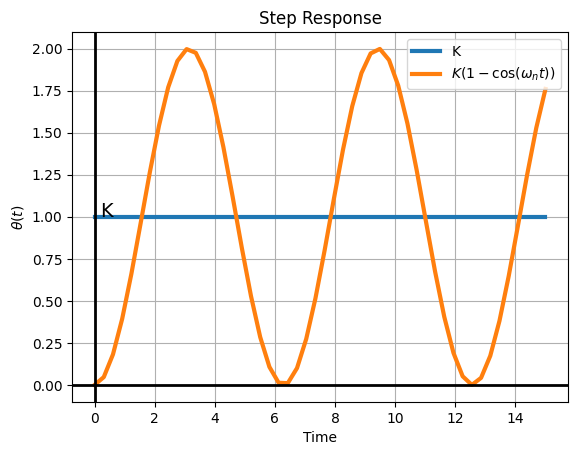

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1

t = np.linspace(0, 15, 50)
theta_t = K*(1-np.cos(omega_n*t))

# Create a new figure and axis
fig, ax = plt.subplots()

ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')
ax.plot(t, theta_t, label=r'$K(1-\cos(\omega_nt))$', linewidth=3)

plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K, 'K', fontsize=14)

plt.legend()
plt.show()

In questo scenario, il sistema presenta oscillazioni attorno al valore di $K$.
Queste oscillazioni, a causa dell'assenza di smorzamento, vengono chiamate oscillazioni non smorzate. La frequenza di queste oscillazioni, $\omega_n$, è definita frequenza naturale non smorzata.

**Nota:** questo è in genere un comportamento indesiderato, ma dipende dai requisiti.

**Domanda pop-up:** Perché il comportamento oscillante non è preferibile nella maggior parte dei sistemi di controllo?
**Risposta**: nella maggior parte degli scenari industriali, le oscillazioni possono portare a inefficienze, usura del sistema o risultati indesiderati.
Esempio: pensa al riscaldamento residenziale con un sistema di controllo on/off. La temperatura oscilla entro un certo intervallo, che potrebbe essere accettabile per il riscaldamento ma non per i processi controllati con precisione.

#### Caso 2, $0<\zeta<1$, Underdamped Case

The response, in this case, showcases damped oscillations.
In our example, this corresponds to $B\ne0$.

This case corresponds, in our example, to the case where:

$$
\frac{k}{J} > \Big(\frac{B}{2J}\Big)^2
$$

con risposta:

$$
\theta(t) = K\Big[1 - \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}} \sin\Big(\omega_d t + \tan^{ -1} \frac{\sqrt{1-\zeta^2}}{\zeta}\Big)\Big]
$$

Dove:
- $\omega_d = \omega_n\sqrt{1-\zeta^2}$, è detta frequenza naturale smorzata.

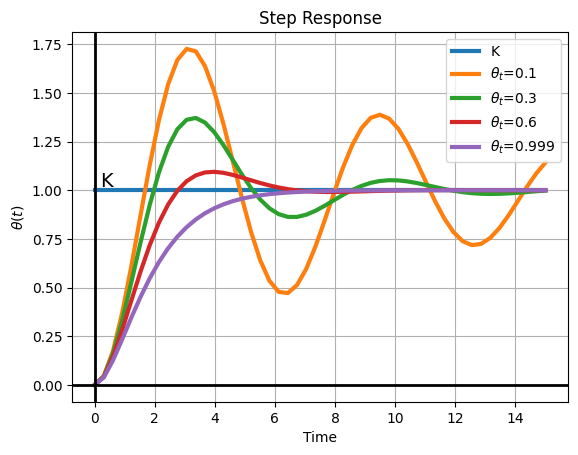

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zetas = [0.1, 0.3, 0.6, 0.999]

t = np.linspace(0, 15, 50)

# Create a new figure and axis
fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')

for zeta in zetas:
    omega_d = omega_n*np.sqrt(1-zeta**2)
    theta_t = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2)*np.sin(omega_d*t + np.arctan(np.sqrt(1-zeta**2)/zeta)))
    #theta_t = K*(1 - (1/np.sqrt(1-zeta**2)) * np.exp(-zeta*omega_n*t) * np.sin(omega_d*t+np.arccos(zeta)))
    ax.plot(t, theta_t, label=r'$\theta_t$='+f"{zeta}", linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)

plt.legend()
plt.show()

In questo regime la risposta del sistema è oscillatoria. Tuttavia, queste oscillazioni non sono illimitate. Invece, si estinguono nel tempo, il che viene spesso descritto come "oscillazioni smorzate", e diminuiscono quando $\zeta$ aumenta.

Quando $\zeta=1$ è la situazione limite in cui le oscillazioni si sono appena estinte.
L'altro caso limite è ovviamente quello in cui $\zeta=0$, che abbiamo appena visto, e per il quale le oscillazioni non sono smorzate.

**Nota** dal grafico sopra come il sistema diventa lento all'aumentare del valore di $\zeta$: il tempo di assestamento, la velocità di risposta, aumenta.
Se il $\zeta$ diminuisce però aumentano le oscillazioni.

### Implicazioni pratiche:
1. **Comportamento del sistema**: nei sistemi di controllo industriale, il comportamento sottosmorzato è solitamente desiderato perché consente di ottenere una risposta rapida senza oscillazioni prolungate. Le oscillazioni sono generalmente considerate indesiderabili nei sistemi di controllo poiché indicano instabilità o inefficienze.

2. **Bilanciare velocità e oscillazione:** c'è un delicato equilibrio da raggiungere. Se
$\zeta$ è troppo piccolo (vicino a 0), il sistema può essere troppo oscillatorio, portando a potenziale instabilità. D'altra parte, se $\zeta$ è troppo grande (si avvicina a 1), il sistema può diventare lento.

3. **Esempi di applicazione:**
Per le applicazioni che possono tollerare alcune oscillazioni in cambio di una risposta rapida (ad esempio, alcuni processi di produzione), un sistema leggermente sottosmorzato potrebbe essere l'ideale.
Negli scenari in cui la precisione dell'assestamento è vitale (ad esempio, il posizionamento del braccio robotico), è fondamentale progettare il sistema in modo che le oscillazioni siano minime, anche a costo di una risposta più lenta.

La scelta del livello di smorzamento nella progettazione del sistema spesso comporta dei compromessi. Anche se spesso si preferisce il caso sottosmorzato, è fondamentale comprendere le esigenze esatte di una particolare applicazione o processo. Ciò garantisce che il sistema risponda in modo ottimale, bilanciando velocità, oscillazione e stabilità.

Diamo ora una visione più dettagliata delle oscillazioni, osservando una tipica risposta sotto-smorzata:

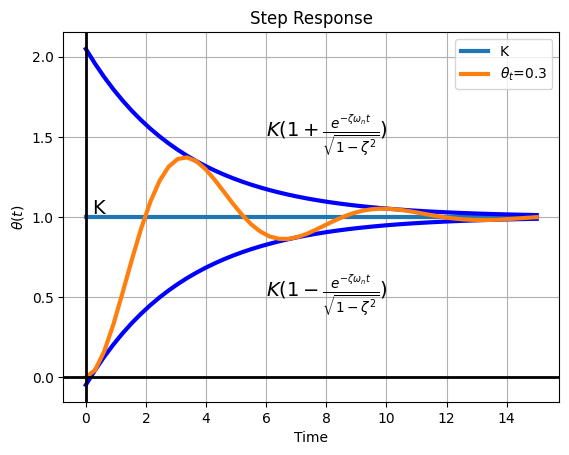

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zeta = 0.3

t = np.linspace(0, 15, 50)

fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')


omega_d = omega_n*np.sqrt(1-zeta**2)
theta_t = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2)*np.sin(omega_d*t + np.arctan(np.sqrt(1-zeta**2)/zeta)))

envelope_plus = K*(1 + np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2))
envelope_minus = K*(1 - np.exp(-zeta*omega_n*t)/np.sqrt(1-zeta**2))

ax.plot(t, envelope_plus, linewidth=3, color='b')
ax.plot(t, envelope_minus, linewidth=3, color='b')    

ax.plot(t, theta_t, label=r'$\theta_t$='+f"{zeta}", linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)
ax.text(6, 1.5, r'$K (1+\frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})$', fontsize=14)

ax.text(6, 0.5, r'$K (1-\frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})$', fontsize=14)

plt.legend()
plt.show()

Le linee blu rappresentano l'inviluppo della risposta:

$$
K (1 \pm \frac{e^{-\zeta\omega_nt}}{\sqrt{1-\zeta^2}})
$$

Il decadimento delle oscillazioni è determinato dall'inviluppo della risposta oscillatoria. Il decadimento dell'inviluppo dipende dal fattore esponenziale:

$$
e^{-\zeta\omega_nt}
$$

La sua costante di tempo è:

$$
e^{-t/\tau} = e^{-\zeta\omega_nt}
$$

O

$$
\tau = \frac{1}{\zeta\omega_n}
$$

Più alto è il valore di $\zeta\omega_n$, più velocemente si estinguono le oscillazioni.


Il sistema oscilla ad una frequenza naturale smorzata, $\omega_d$, che si esprime come:

  $$\omega_d = \omega_n\quadrato{1-\zeta^2}$$
  
e dove $\omega_n$ è la frequenza naturale non smorzata.

#### Caso 3, $\zeta=1$, Smorzato in modo critico

Qui il sistema è sull’orlo dell’oscillazione. La risposta mostra uno scenario in cui le oscillazioni vengono semplicemente eliminate.

Nel nostro esempio ciò corrisponde a:

$$
\frac{k}{J} = \Grande(\frac{B}{2J}\Grande)^2
$$

con risposta:

$$
\theta(t) = K\Grande[1 - e^{-\omega_n t} - \omega_n t e^{-\omega_n t} \Grande]
$$

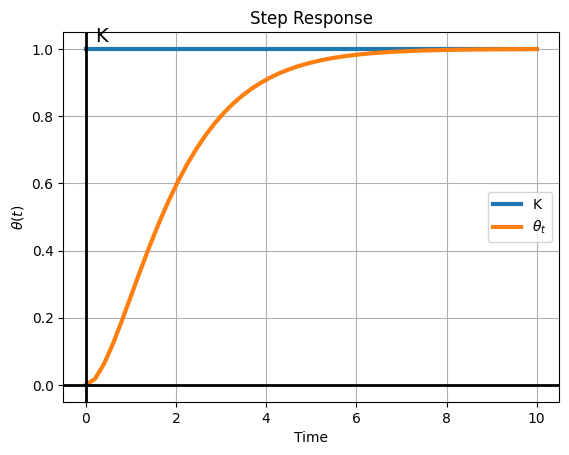

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti, step, impulse

K = 1
omega_n = 1
zeta = 1

t = np.linspace(0, 10, 50)

fig, ax = plt.subplots()
ax.plot(t, K*np.ones((len(t))), linewidth=3, label='K')


theta_t = K*(1 - np.exp(-zeta*omega_n*t)  -omega_n*t*np.exp(-zeta*omega_n*t))


ax.plot(t, theta_t, label=r'$\theta_t$', linewidth=3)

    
plt.title("Step Response")
plt.xlabel("Time")
plt.ylabel(r"$\theta(t)$")
plt.grid(True)

# Plot the x=0 and y=0 axes
ax.axhline(0, color='black', linewidth=2)  # Horizontal line at y=0
ax.axvline(0, color='black', linewidth=2)  # Vertical line at x=0

ax.text(0.2, K+0.02, 'K', fontsize=14)

plt.legend()
plt.show()

- Raggiungere uno smorzamento critico è impegnativo, poiché richiede una messa a punto precisa. Anche piccole deviazioni possono portare il sistema a uno smorzamento eccessivo o insufficiente.

- I sistemi criticamente smorzati ritornano all'equilibrio o al valore di stato stazionario senza superamento (oscillazione) e nel più breve tempo possibile.

- Mentre i sistemi sottosmorzati oscillano attorno all'equilibrio prima di stabilizzarsi, i sistemi criticamente smorzati no. Si avvicinano direttamente all'equilibrio, con il tempo di risposta più rapido che evita l'oscillazione.

- Per un'equazione differenziale omogenea lineare del secondo ordine che descrive un sistema, lo stato criticamente smorzato produce due radici reali uguali. Ciò si traduce in una soluzione che è una combinazione di termini di decadimento esponenziale.


**Esempi di applicazione:**
- Sospensioni del veicolo: nelle auto, gli ammortizzatori mirano ad essere smorzati in modo critico per fornire una guida confortevole assorbendo rapidamente gli urti senza far oscillare l'auto.
- Elettronica: nella progettazione dei circuiti, le risposte criticamente smorzate sono preferite per l'elaborazione del segnale in cui il segnale deve stabilizzarsi rapidamente senza sovraelongazione.

#### Caso 4, $\zeta>1$, eccessivamente smorzato

- Il caso di smorzamento eccessivo rappresenta una situazione in cui lo smorzamento è eccessivo, portando ad un lento ritorno all'equilibrio.

- I sistemi sovrasmorzati ritornano all'equilibrio più lentamente sia dei sistemi criticamente smorzati che di quelli sottosmorzati, senza superamento.

- Per l'equazione differenziale omogenea lineare del secondo ordine che descrive un tale sistema, lo stato sovrasmorzato produce due radici reali distinte. Ciò si traduce in una risposta che combina due distinti termini di decadimento esponenziale.

- Ci sono casi in cui lo smorzamento eccessivo è intenzionale. In alcune apparecchiature o processi sensibili, l'oscillazione (anche se lieve) può essere dannosa o indesiderabile, rendendo un ritorno più lento all'equilibrio un compromesso accettabile. Il case eccessivamente smorzato sottolinea la necessità di un'attenta considerazione nel controllo e nella progettazione del sistema. Anche se potrebbe sembrare non ottimale a causa della sua risposta lenta, in alcuni contesti questo ritardo deliberato è fondamentale per mantenere la sicurezza e la funzionalità


**Esempi di applicazione:**
- Chiudiporta: molti chiudiporta commerciali sono eccessivamente smorzati per garantire che le porte si chiudano completamente senza sbattere o rimbalzare.
- Sistemi di sicurezza: alcuni meccanismi di sicurezza potrebbero impiegare uno smorzamento eccessivo per garantire un ritorno graduale, anche se più lento, a uno stato sicuro.